In [1]:
from time import time as now
import numpy as np
import smoothing, eval, sys, path_generator
from main import eval_time

In [33]:
path_rw, _ = path_generator.generate_random_walk(N=2)
path_rw_kalman = np.array(smoothing.kalman(path_rw))
path_rw_bezier_sp = np.array(smoothing.bezier_divided(path_rw))

In [ ]:
path_rrt, obstacles = path_generator.generate_rrt(N=2)
path_rrt_kalman = np.array(smoothing.kalman(path_rrt))
path_rrt_bezier = np.array(smoothing.bezier(path_rrt))
path_rrt_bezier_sp = np.array(smoothing.bezier_divided(path_rrt))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial.distance import cdist
from main import N_LIST

path_rw = np.array(path_rw)
path_rrt = np.array(path_rrt)
path_length_rw = int(np.sqrt(np.sum(np.diff(path_rw, axis=1)**2, axis=0))[0])
path_length_rrt = int(np.sqrt(np.sum(np.diff(path_rrt, axis=1)**2, axis=0))[0])

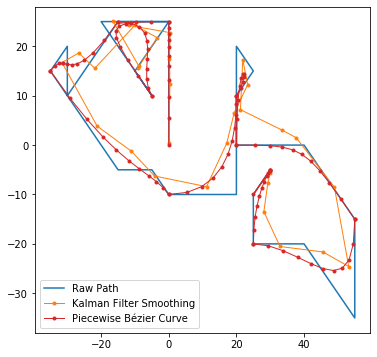

In [68]:
# Display the environment and the paths for the random walk
plt.figure(figsize=(6,6))

plt.plot(*zip(*path_rw), label='Raw Path', color='#1f77b4')
plt.plot(*zip(*path_rw_kalman), '-o', markersize=3, linewidth=1, color='#ff7f0e', label='Kalman Filter Smoothing')
plt.plot(*zip(*path_rw_bezier_sp), '-o', markersize=3, linewidth=1, color='#d62728', label='Piecewise Bézier Curve')
plt.legend()

plt.savefig('path_rw.png')

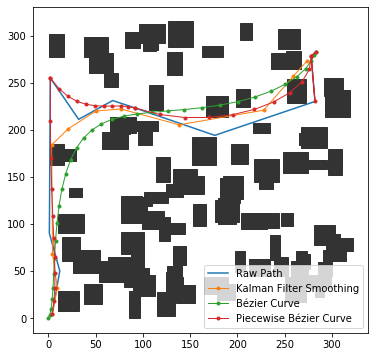

In [69]:
# Display the environment and the paths for the RRT*
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

for o in obstacles:
    rect = patches.Rectangle((o[0], o[1]), o[2], o[3], color=(.2,.2,.2))
    ax.add_patch(rect)

plt.plot(*zip(*path_rrt), label='Raw Path', color='#1f77b4')
plt.plot(*zip(*path_rrt_kalman), '-o', markersize=3, linewidth=1, color='#ff7f0e', label='Kalman Filter Smoothing')
plt.plot(*zip(*path_rrt_bezier), '-o', markersize=3, linewidth=1, color='#2ca02c', label='Bézier Curve')
plt.plot(*zip(*path_rrt_bezier_sp), '-o', markersize=3, linewidth=1, color='#d62728', label='Piecewise Bézier Curve')
plt.legend(loc='lower right')

plt.savefig('path_rrt.png')

In [1]:
plt.figure(figsize=(6,6))

plt.plot(np.diag(cdist(path_rw, path_rw_kalman[::int(len(path_rw_kalman) / len(path_rw))])), color='#ff7f0e', label='Kalman Filter Smoothing')
plt.plot(np.diag(cdist(path_rw, path_rw_bezier_sp[::int(len(path_rw_bezier_sp) / len(path_rw))])), color='#d62728', label='Piecewise Bézier Curve')

plt.legend()
#plt.savefig('similarity_rw.png')

NameError: name 'plt' is not defined

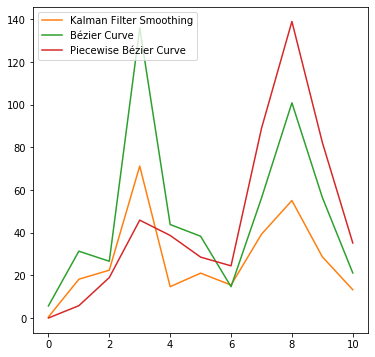

In [71]:
plt.figure(figsize=(6,6))

plt.plot(np.diag(cdist(path_rrt, path_rrt_kalman[::int(len(path_rrt_kalman) / len(path_rrt))])), color='#ff7f0e', label='Kalman Filter Smoothing')
plt.plot(np.diag(cdist(path_rrt, path_rrt_bezier[::int(len(path_rrt_bezier) / len(path_rrt))])), color='#2ca02c', label='Bézier Curve')
plt.plot(np.diag(cdist(path_rrt, path_rrt_bezier_sp[::int(len(path_rrt_bezier_sp) / len(path_rrt))])), color='#d62728', label='Piecewise Bézier Curve')

plt.legend(loc='upper left')
plt.savefig('similarity_rrt.png')